# Linear Regression

## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —
- To identify the variables which are significant in predicting the demand for shared bikes.
- To create a linear model that can predict the demand for shared bikes with available variables.
- To know the accuracy of the model, i.e. how well those variables describe the bike demands.

## Step 1: Reading and Understanding the Data

In [837]:
import numpy as np
import pandas as pd

In [838]:
days_data = pd.read_csv('day.csv')
days_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [839]:
# we dont require instant and dteday (as we already have date related information weekday, year, month, workingday etc.)
days_data.drop(columns=['dteday', 'instant'], inplace=True)

In [840]:
# inspecting shape
days_data.shape

(730, 14)

**NOTE:** Here many categorical variables are represented numerically. We won't consider them as numerical in the EDA and data understanding. <br> 
Lets first seggregate the variable into numerical and categorical

In [841]:
# seggregate the variable into numerical and categorical
numerical_variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 
                         'weekday', 'workingday', 'weathersit']

**NOTE:** Consider few categorical variables are given as numerical:
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy **(clear weather)**
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist **(cloudy weather)**
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds **(rainy weather)**
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog **(extreme weather)**

We will convert these to categorical variables first so that they not considered as numerical in the analysis. We will then add dummy variables corresponding to them at the time of data-preparation. <br>

In [842]:
seasonCategories = ['spring', 'summer', 'fall', 'winter']
weatherCategories = ['clear', 'cloudy', 'rainy', 'extreme']

In [843]:
days_data['weathersit'].apply(lambda x : weatherCategories[x-1]).value_counts()

clear     463
cloudy    246
rainy      21
Name: weathersit, dtype: int64

In [844]:
days_data['season'] = days_data['season'].apply(lambda x : seasonCategories[x-1])

In [845]:
days_data['weathersit'] = days_data['weathersit'].apply(lambda x : weatherCategories[x-1])

In [846]:
# inspecting null value information
days_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 80.0+ KB


In [847]:
days_data[numerical_variables].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

In [848]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 576x576 with 0 Axes>

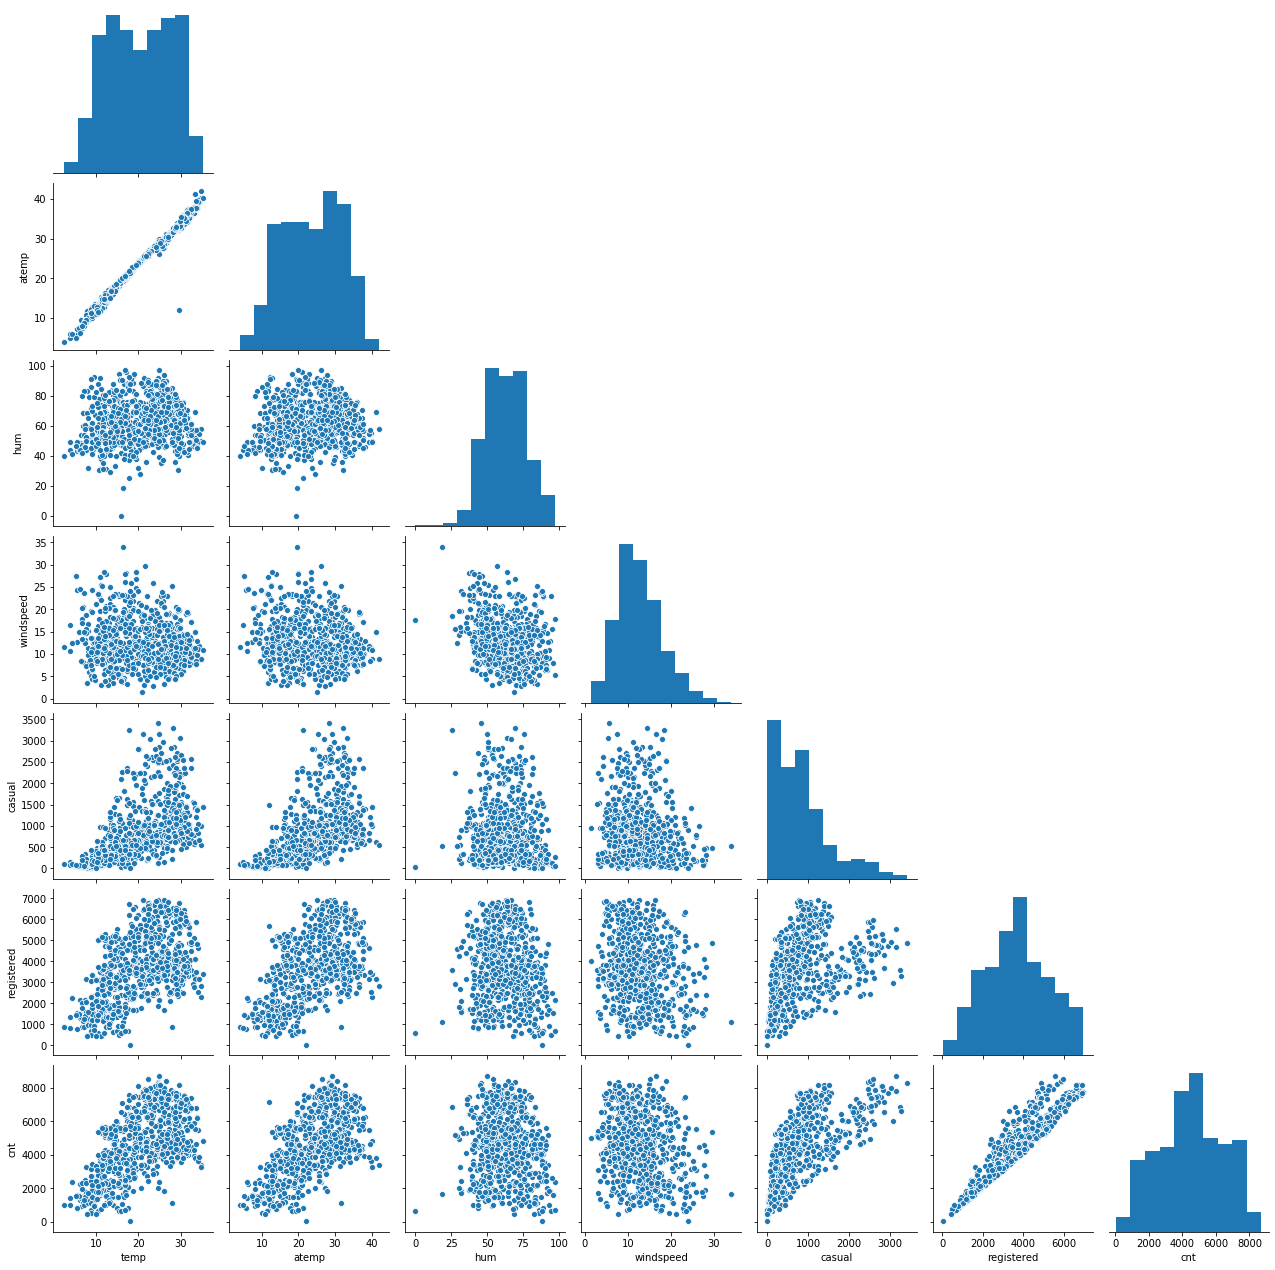

In [849]:
# the pairplot is saved as 'pairplots.png'... so no need to compute again
plt.figure(figsize=(8, 8))
sns.pairplot(days_data[numerical_variables], corner=True)
plt.savefig('pairplots.png', dpi=300, bbox_inches='tight')
plt.show()

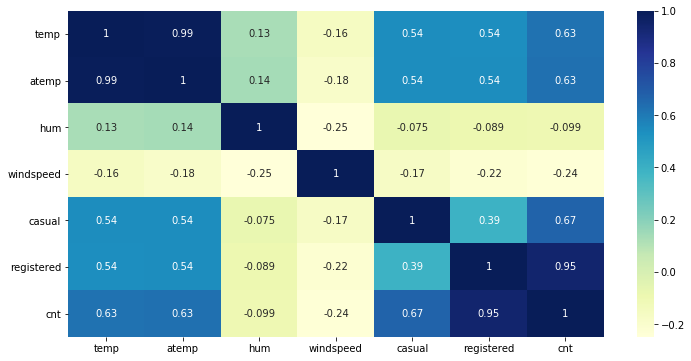

In [850]:
# correlation heatmap between
plt.figure(figsize=(12, 6))
sns.heatmap(days_data[numerical_variables].corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

From the pair-plots and heatmaps, `temp` and `atemp` are highly correlated (0.99). <br>
We will drop `atemp` column from the data. <br>
**NOTE:** There is a very high correlation between `cnt`, `registered` and `casual`. Each one represent the demand of bike sharing. So, we can use either one of the three as our target variable. Here, we will use `cnt` as the target variable and hence will be dropping the other two.

In [851]:
days_data.drop(columns=['atemp', 'casual', 'registered'], inplace=True)

In [852]:
# update our numerical columns list removing casual and registered variables
numerical_variables = ['temp', 'hum', 'windspeed', 'cnt']

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's look at the distributions for some of these variables.

In [853]:
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 
                         'weekday', 'workingday', 'weathersit']

Here we visualize the violin plots for various categorical variable to get an idea of the distribution of the demand across various categorical variables.

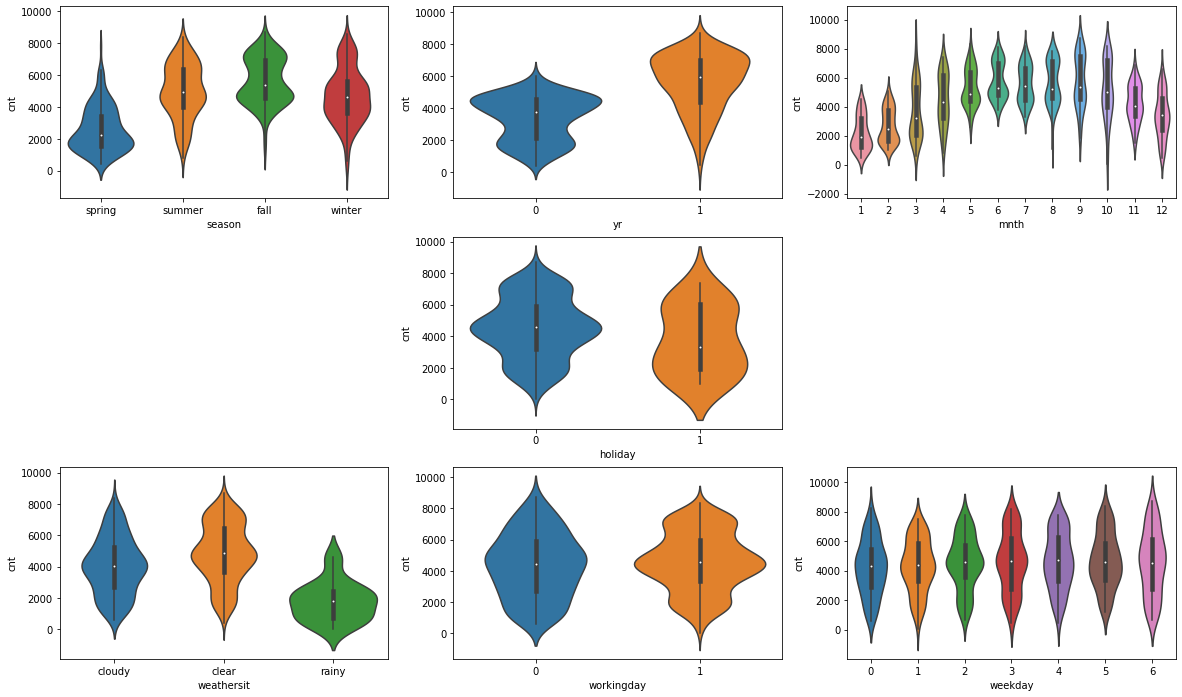

In [854]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.violinplot(x='season', y='cnt', data=days_data)
plt.subplot(3,3,2)
sns.violinplot(x='yr', y='cnt', data=days_data)
plt.subplot(3,3,3)
sns.violinplot(x='mnth', y='cnt', data=days_data)
plt.subplot(3,3,5)
sns.violinplot(x='holiday', y='cnt', data=days_data)
plt.subplot(3,3,7)
sns.violinplot(x='weathersit', y='cnt', data=days_data)
plt.subplot(3,3,8)
sns.violinplot(x='workingday', y='cnt', data=days_data)
plt.subplot(3,3,9)
sns.violinplot(x='weekday', y='cnt', data=days_data)
plt.savefig('violinplots.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 3: Data Preparation

In [855]:
days_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

The variable `season` and `weathersit` has 4 categories each. We need to convert these into numerical variables.

For this, we will use `dummy variables`.

In [856]:
seasonVaraibles = pd.get_dummies(days_data['season'], drop_first=True)

In [857]:
weatherVariables = pd.get_dummies(days_data['weathersit'], drop_first=True)

In [858]:
days_data = pd.concat([days_data, seasonVaraibles, weatherVariables], axis=1)

In [859]:
days_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,rainy
0,spring,0,1,0,6,0,cloudy,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,spring,0,1,0,0,0,cloudy,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,spring,0,1,0,1,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,0,2,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,0,3,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [860]:
# dropping season and weathersit columns now
days_data.drop(columns=['season', 'weathersit'], inplace=True)

### Transforming Cyclical Variables

#### Using `sine` and `cosine` projections as derived variables

Note that variables like `mnth` and `weekday` are cyclical in nature. After 12th month the 1st month comes again. And, after 6th day again 0th day comes again.

If we keep it as it is and apply rescaling to them they will loose their cyclical nature. That would be a loss of information. Hence we will add their `sine` and `cosine` projections

These `sine` and `cosine` projections are **derived variables**

In [861]:
days_data['mnth_sin'] = np.sin((days_data['mnth']-1)*(2.*np.pi/12))
days_data['mnth_cos'] = np.cos((days_data['mnth']-1)*(2.*np.pi/12))
days_data['weekday_sin'] = np.sin(days_data['weekday']*(2.*np.pi/7))
days_data['weekday_cos'] = np.cos(days_data['weekday']*(2.*np.pi/7))

In [862]:
days_data.drop(columns=['mnth', 'weekday'], inplace=True)

In [863]:
days_data.to_csv('days_data.csv', index=False)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [864]:
data = pd.read_csv('days_data.csv')

In [865]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling to rescale all the numerical feature that are not between -1 and 1

In [866]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [867]:
variables_to_rescale = ['temp', 'hum', 'windspeed', 'cnt']

df_train[variables_to_rescale] = scaler.fit_transform(df_train[variables_to_rescale])

In [868]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,rainy,mnth_sin,mnth_cos,weekday_sin,weekday_cos
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,-1.000000e+00,-1.836970e-16,0.974928,-0.222521
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,1.224647e-16,-1.000000e+00,0.974928,-0.222521
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,8.660254e-01,5.000000e-01,-0.781831,0.623490
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,-5.000000e-01,8.660254e-01,0.000000,1.000000
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,1.000000e+00,6.123234e-17,-0.781831,0.623490


In [869]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,cloudy,rainy,mnth_sin,mnth_cos,weekday_sin,weekday_cos
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,5.100000e+02,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,-0.013866,4.587737e-03,0.011817,0.013034
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.712507,7.029118e-01,0.699143,0.716138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,-1.000000e+00,-0.974928,-0.900969
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,-0.866025,-5.000000e-01,-0.781831,-0.900969
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.123234e-17,0.000000,-0.222521
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.866025,5.000000e-01,0.781831,0.623490
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000e+00,0.974928,1.000000


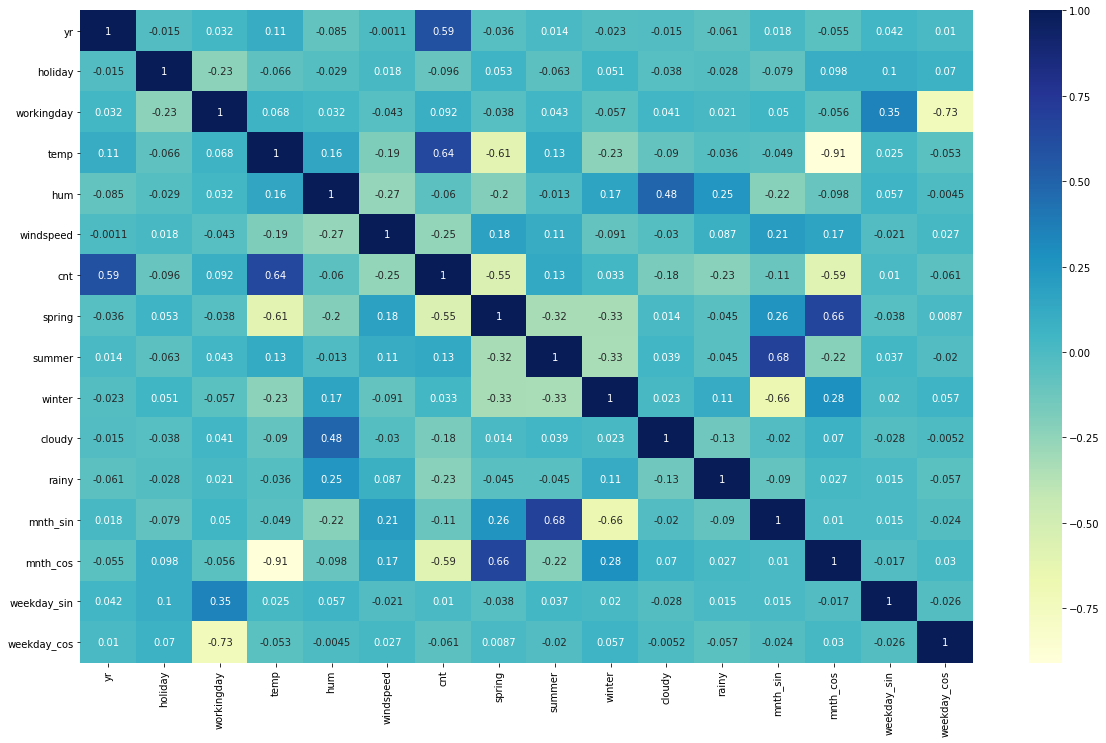

In [870]:
# correlation heatmap between variables to see feature selection criteria
plt.figure(figsize=(20, 12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps_train_ready.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 5: Building a linear model

Here we will be using `statsmodels`

Lets create a helper function `trainModel()` that we can reuse to train the model.
- `params:`
    - **data:** <br> data_frame to train on
    - **predictors:** <br> list of predictor variables to use
    - **target:** <br> target variable to use
- `returns:`
    - **lr:** <br> trained model using statsmodels.api.OLS

In [871]:
import statsmodels.api as sm

In [872]:
def trainModel(data, predictors, target):
    # creating X and y sets for training the model
    dfc = data.copy()
    y_train = dfc.pop(target)
    X_train = dfc[predictors]
    
    # training the model based on the predictors provided using stats model
    
    # adding constant using sm.add_constant() method
    X_train_lm = X_train[predictors]
    X_train_lm = sm.add_constant(X_train_lm)
    
    # fitting the data and training the model using sm.OLS() method
    lm = sm.OLS(y_train, X_train_lm).fit()
    
    # return the trained model
    return [lm, X_train, y_train, X_train_lm]

Lets create a helper function `computeVIF()` that we can reuse to train the model.
- `params:`
    - **data:** <br> data_frame to train on
    - **predictors:** <br> list of predictor variables to use
- `returns:`
    - **vif:** <br> vif of predictor variables

In [873]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [874]:
def computeVIF(data, predictors):
    # creating X and y sets for training the model
    dfc = data.copy()
    y_train = dfc.pop(target)
    X_train = dfc[predictors]
    
    #calculating VIF for predictor variables
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Feature Selection and narrowing down on the predicor variables

In [875]:
targetVariable = 'cnt'
predictorVariables = [x for x in df_train.columns if x != target]

In [876]:
[lm, X_train, y_train, X_train_lm] = trainModel(data=df_train, predictors=predictorVariables, target=targetVariable)

In [877]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          7.94e-181
Time:                        15:12:53   Log-Likelihood:                 494.71
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     494   BIC:                            -889.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2816      0.038      7.343      

In [878]:
vif = computeVIF(data=df_train, predictors=predictorVariables)
vif

,Features,VIF
4,hum,32.66
3,temp,31.46
2,workingday,8.98
12,mnth_cos,8.58
6,spring,7.90
7,summer,5.67
8,winter,5.18
11,mnth_sin,4.79
5,windspeed,4.78
14,weekday_cos,2.46


In [879]:
len(predictorVariables)

15

#### Recursive Feature Elimination (RFE)

Here as we can see that there are many variables which have high p-value and some variables which have very high VIF. We will use **RFE** to eliminate some of the features.<br>

We will use `sklearn` for this.

Lets create a helper function `recursivelyEliminateFeatures()` that we can reuse to get rfe values of the model.
- `params:`
    - **data:** <br> data_frame to train on
    - **predictors:** <br> list of predictor variables to use
    - **target:** <br> target variable to use
    - **keep:** <br> the number of predictor varaibles that we intend to keep
- `returns:`
    - **rfe:** <br> rfe object that will help us eliminate the features
    - **supported:** <br> supported predictors
    - **unsupported:** <br> unsupported predicotrs

In [880]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [881]:
def recursivelyEliminateFeatures(data, predictors, target, keep):
     # creating X and y sets for training the model
    dfc = data.copy()
    y_train = dfc.pop(target)
    X_train = dfc[predictors]
    
    # Running RFE with the output number of the variable equal to 10
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    rfe = RFE(lm, keep)
    rfe = rfe.fit(X_train, y_train)
    
    supported = list(X_train.columns[rfe.support_])
    
    unsupported = list(X_train.columns[~rfe.support_])
    
    return [rfe, supported, unsupported]

In [882]:
[rfe, supported, unsupported] = recursivelyEliminateFeatures(data=df_train, predictors=predictorVariables, target=targetVariable, keep=10)

In [883]:
list(zip(df_train[predictorVariables].columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('rainy', True, 1),
 ('mnth_sin', False, 2),
 ('mnth_cos', False, 3),
 ('weekday_sin', False, 5),
 ('weekday_cos', False, 6)]

**Building a model with rfe_supported predictors**

In [884]:
[lm, X_train, y_train, X_train_lm] = trainModel(data=df_train, predictors=supported, target=targetVariable)

In [885]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          4.78e-183
Time:                        15:12:53   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2925      0.036      8.224      0.0

In [886]:
vif = computeVIF(data=df_train, predictors=supported)
vif

,Features,VIF
3,hum,27.02
2,temp,14.79
4,windspeed,4.64
5,spring,3.71
7,winter,3.05
8,cloudy,2.28
6,summer,2.24
0,yr,2.07
9,rainy,1.24
1,holiday,1.04


**Let's try to drop `hum` because it has a very high VIF**

In [887]:
supported.remove('hum')

In [888]:
[lm, X_train, y_train, X_train_lm] = trainModel(data=df_train, predictors=supported, target=targetVariable)

In [889]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.42e-181
Time:                        15:12:53   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2223      0.030      7.436      0.0

In [890]:
vif = computeVIF(data=df_train, predictors=supported)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,yr,2.07
4,spring,1.96
5,summer,1.79
6,winter,1.62
7,cloudy,1.52
8,rainy,1.08
1,holiday,1.04


**Training Results**
- Here, we have a Linear Regression model with **9 predictor variables**.
- p-value for each predictor is below **0.05** an VIF for all predictors is less than **5**.
- R-squared:                       0.823
- Adj. R-squared:                  0.820
- F-statistic:                     258.0
- Prob (F-statistic):          1.42e-181

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [891]:
y_train_price = lm.predict(X_train_lm)

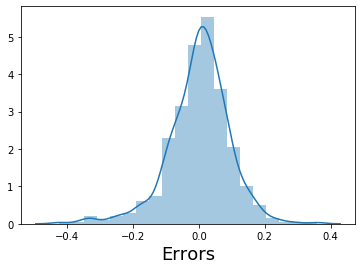

In [892]:
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.savefig('residual_analysis_train_data.png', dpi=300, bbox_inches='tight')
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [893]:
variables_to_rescale = ['temp', 'hum', 'windspeed', 'cnt']

df_test[variables_to_rescale] = scaler.transform(df_test[variables_to_rescale])

#### Dividing into X_test and y_test

In [894]:
y_test = df_test.pop(targetVariable)
X_test = df_test

In [895]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [896]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

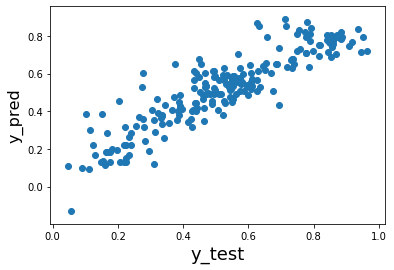

In [897]:
# Plotting y_test and y_pred to understand the spread.
plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)      
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

### Caclulating `r2_score` on `y_test` and `y_pred` 

In [898]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8009724887482659

From the calculation above our `r2_score` is `0.8009724887482659`